In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/classification/BankCustomerData.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [ ]:
df.shape


(42639, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           42639 non-null  int64
 1   job           42639 non-null  int64
 2   marital       42639 non-null  int64
 3   education     42639 non-null  int64
 4   default       42639 non-null  int64
 5   balance       42639 non-null  int64
 6   housing       42639 non-null  int64
 7   loan          42639 non-null  int64
 8   contact       42639 non-null  int64
 9   day           42639 non-null  int64
 10  month         42639 non-null  int64
 11  duration      42639 non-null  int64
 12  campaign      42639 non-null  int64
 13  pdays         42639 non-null  int64
 14  previous      42639 non-null  int64
 15  poutcome      42639 non-null  int64
 16  term_deposit  42639 non-null  int64
dtypes: int64(17)
memory usage: 5.5 MB


In [ ]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,4.305823,1.160440,1.213443,0.019020,1331.863951,0.576702,0.166162,0.661296,15.854781,5.518446,255.957504,2.816412,34.169141,0.465442,2.610380,0.092896
std,10.200236,3.277115,0.606294,0.745555,0.136597,3011.537676,0.494088,0.372231,0.907340,8.293901,2.977413,258.361368,3.163564,92.041713,2.166705,0.953935,0.290290
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,62.000000,0.000000,0.000000,0.000000,8.000000,3.000000,101.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,429.000000,1.000000,0.000000,0.000000,16.000000,6.000000,177.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1381.500000,1.000000,0.000000,2.000000,21.000000,8.000000,315.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,536.000000,275.000000,3.000000,1.000000


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes
42638,32,management,single,tertiary,no,1962,no,no,cellular,13,jan,130,1,-1,0,unknown,no


In [ ]:
for i in df.describe(include='all').columns:
  print(f'Unique values for {i}: ',df[i].unique())


Unique values for age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92]
Unique values for job:  [ 4  9  2  1 11  5  0  7  6 10  3  8]
Unique values for marital:  [1 2 0]
Unique values for education:  [2 1 3 0]
Unique values for default:  [0 1]
Unique values for balance:  [2143   29    2 ... 6447 6718 1962]
Unique values for housing:  [1 0]
Unique values for loan:  [0 1]
Unique values for contact:  [2 0 1]
Unique values for day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Unique values for month:  [ 8  6  5  1 10  9  2  4  3  7  0 11]
Unique values for duration:  [ 261  151   76 ... 2062 1472 1370]
Unique values for campaign:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 

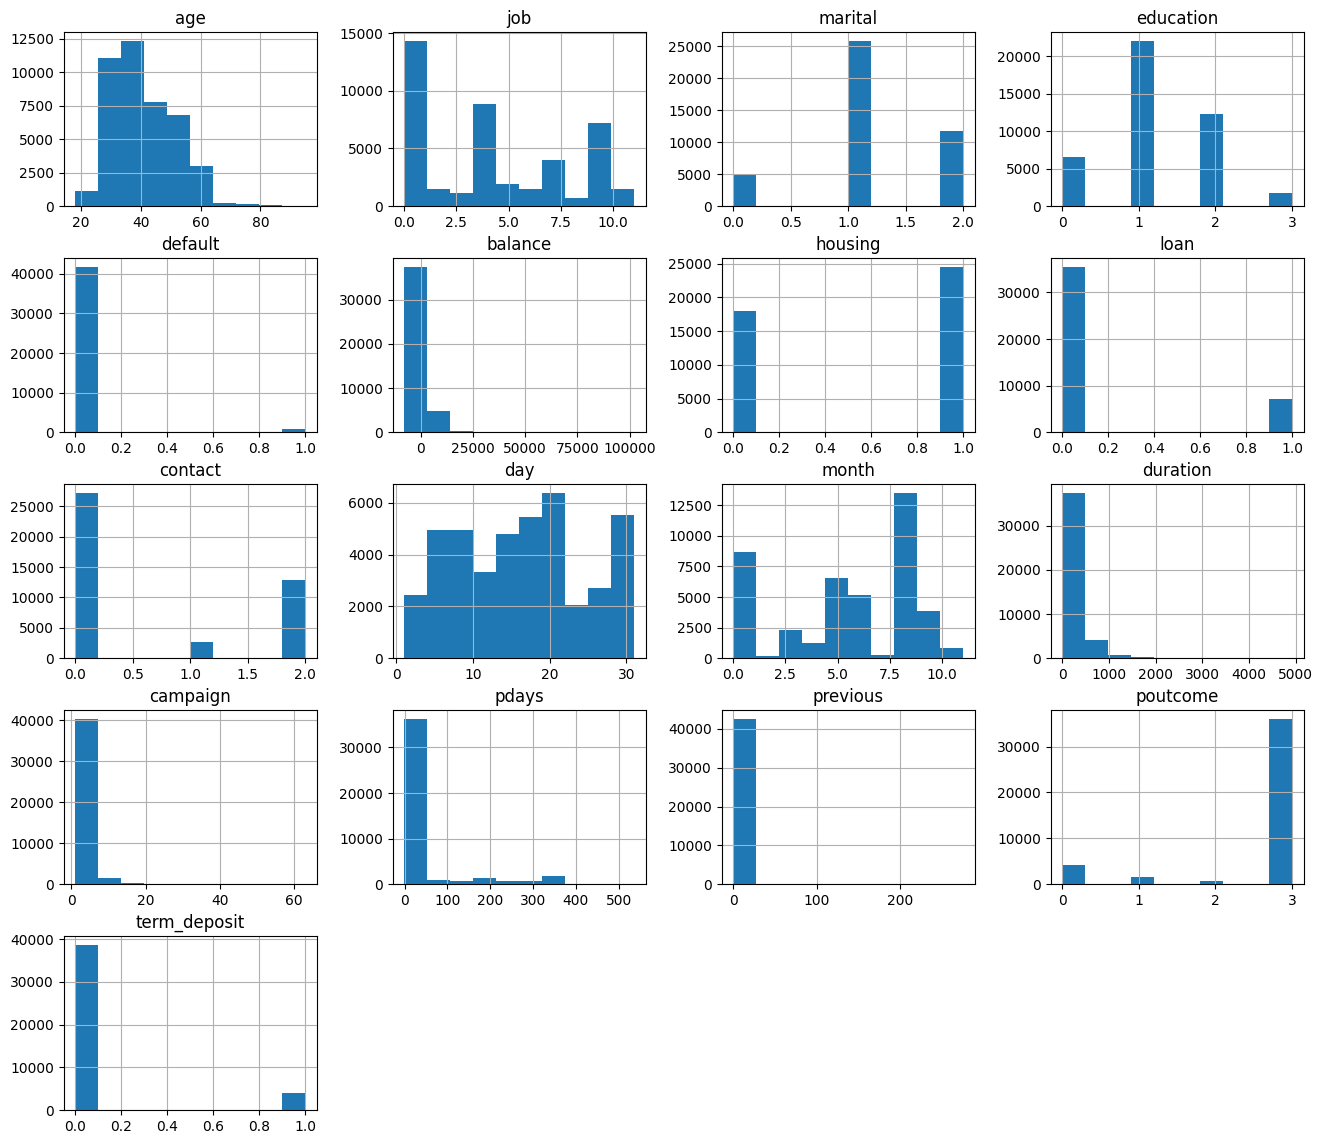

In [ ]:
hist = df.hist(bins=10, figsize=(16,14))

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


customer_tier
Low     33469
Mid      7821
High     1349
Name: count, dtype: int64
   balance  duration  age customer_tier
0     2143       261   58           Mid
1       29       151   44           Low
2        2        76   33           Low
3     1506        92   47           Low
4        1       198   33           Low


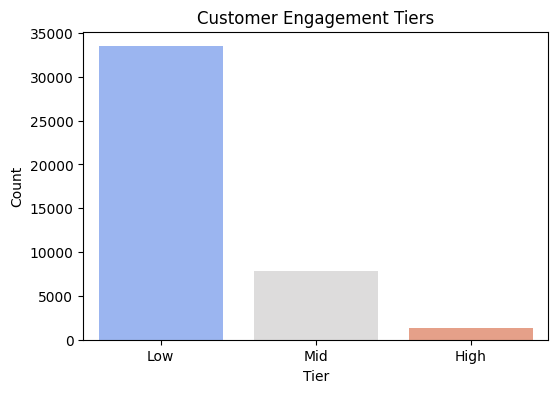

In [ ]:
low_cutoff = df[['balance', 'duration', 'age']].quantile(0.4)
mid_cutoff = df[['balance', 'duration', 'age']].quantile(0.7)

def classify_customer(row):
    if (row['balance'] > mid_cutoff['balance'] and
        row['duration'] > mid_cutoff['duration'] and
        row['age'] > mid_cutoff['age']):
        return 'High'
    elif (row['balance'] > low_cutoff['balance'] and
          row['duration'] > low_cutoff['duration'] and
          row['age'] > low_cutoff['age']):
        return 'Mid'
    else:
        return 'Low'
df['customer_tier'] = df.apply(classify_customer, axis=1)


print(df['customer_tier'].value_counts())

print(df[['balance', 'duration', 'age', 'customer_tier']].head())

plt.figure

plt.figure(figsize=(6, 4))
sns.countplot(x="customer_tier", data=df, palette="coolwarm", order=['Low', 'Mid', 'High'])
plt.title("Customer Engagement Tiers")
plt.xlabel("Tier")
plt.ylabel("Count")
plt.show()


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,customer_tier
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,Mid
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,Low
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,Low
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,Low
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,Low


<Axes: ylabel='balance'>

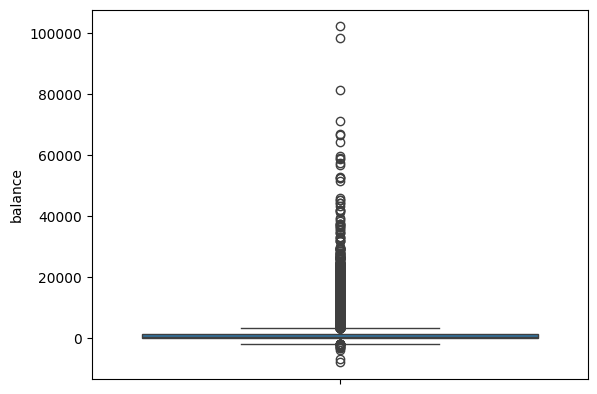

In [ ]:
sns.boxplot(df['balance'])

This box plot shows the distribution of the balance column. The box represents the middle 50% of the data, the line inside is the median, and the whiskers extend to 1.5 times the interquartile range (IQR). The black circles are outliers—values much higher than the rest. Your data is right-skewed with many high-balance outliers.


Feature: age
Number of outliers: 258
Examples of outliers: 29158    83
29261    75
29263    75
29322    83
29865    75
Name: age, dtype: int64
Number of inliers: 42381

Feature: job
Number of outliers: 0
Examples of outliers: Series([], Name: job, dtype: int64)
Number of inliers: 42639

Feature: marital
Number of outliers: 0
Examples of outliers: Series([], Name: marital, dtype: int64)
Number of inliers: 42639

Feature: education
Number of outliers: 0
Examples of outliers: Series([], Name: education, dtype: int64)
Number of inliers: 42639

Feature: default
Number of outliers: 811
Examples of outliers: 7      1
79     1
338    1
419    1
458    1
Name: default, dtype: int64
Number of inliers: 41828

Feature: balance
Number of outliers: 707
Examples of outliers: 34     10635
69     12223
334    24598
446    45248
920    58544
Name: balance, dtype: int64
Number of inliers: 41932

Feature: housing
Number of outliers: 0
Examples of outliers: Series([], Name: housing, dtype: int64)
Number of

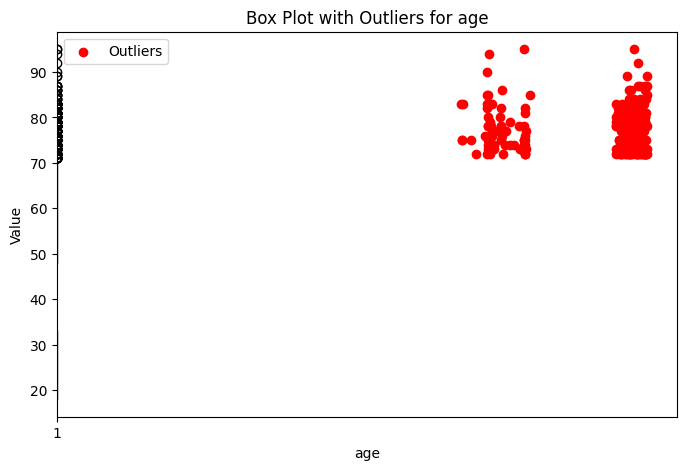

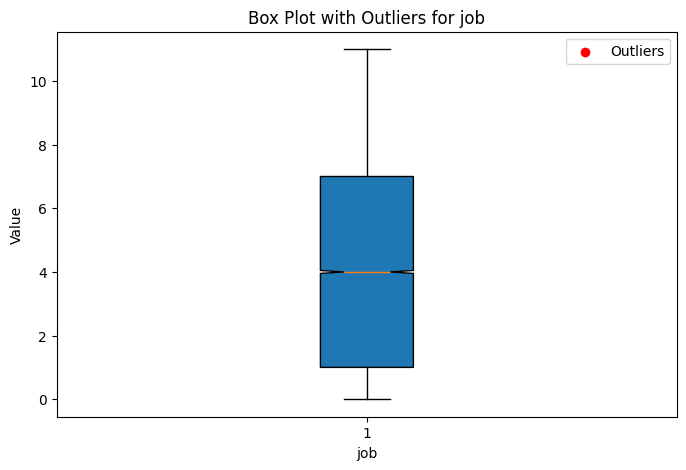

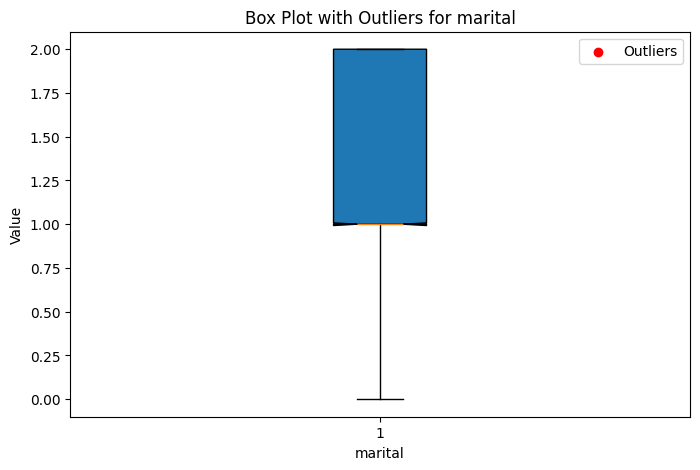

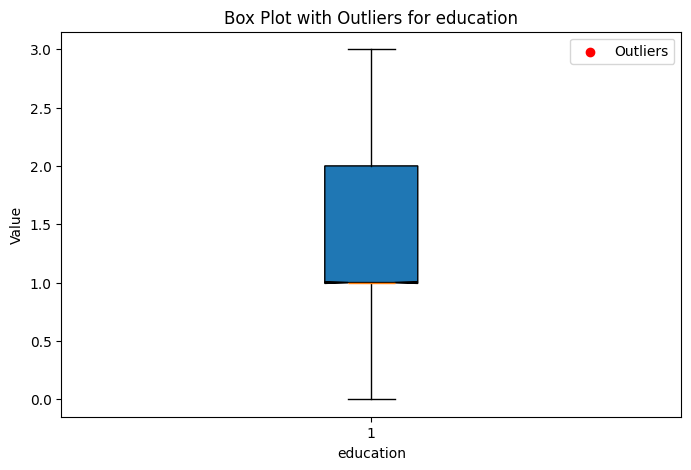

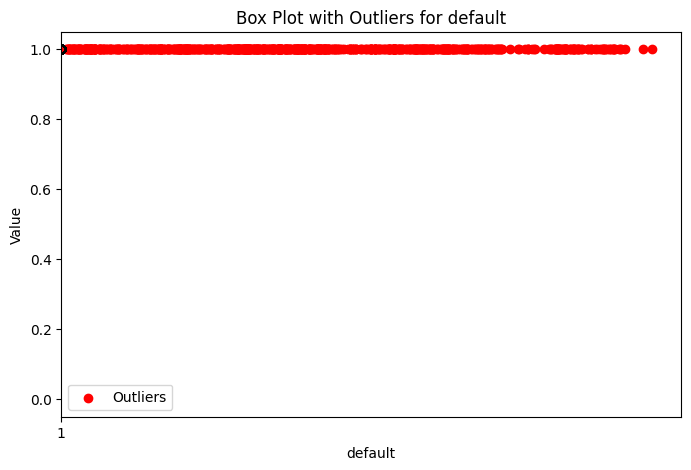

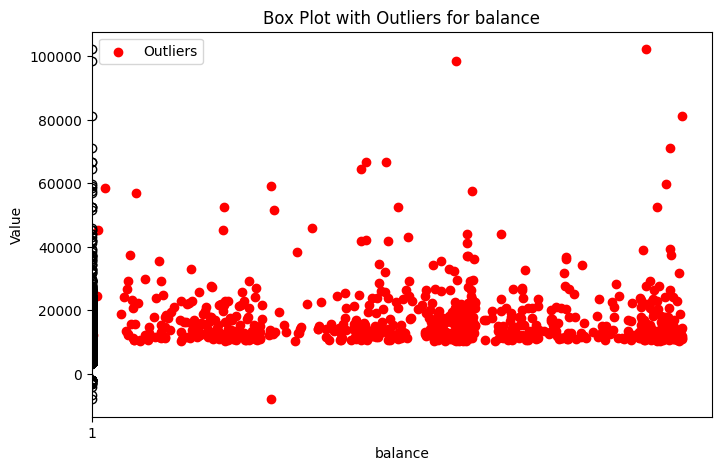

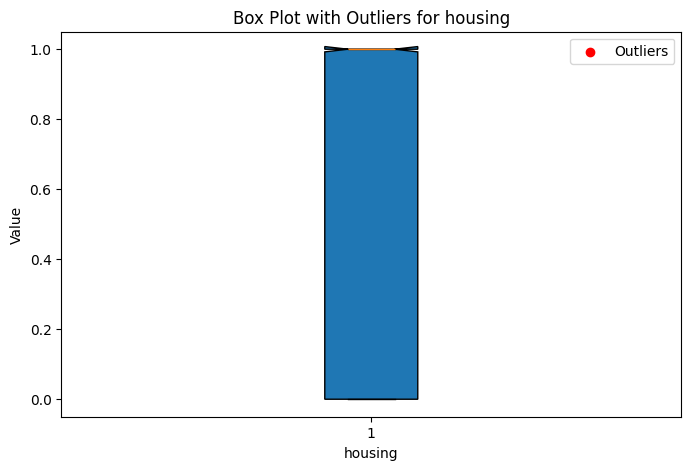

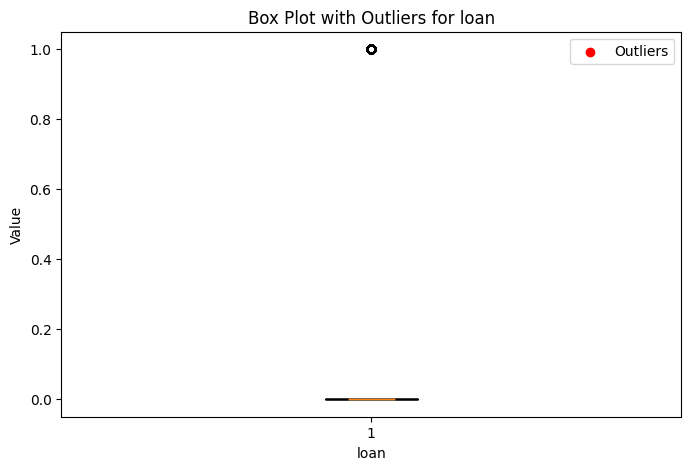

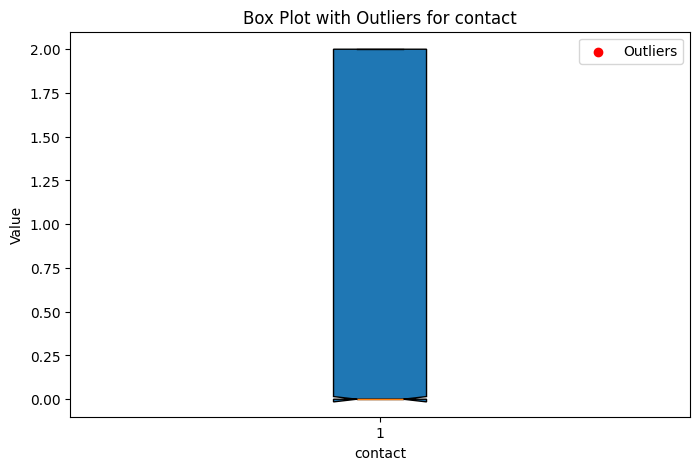

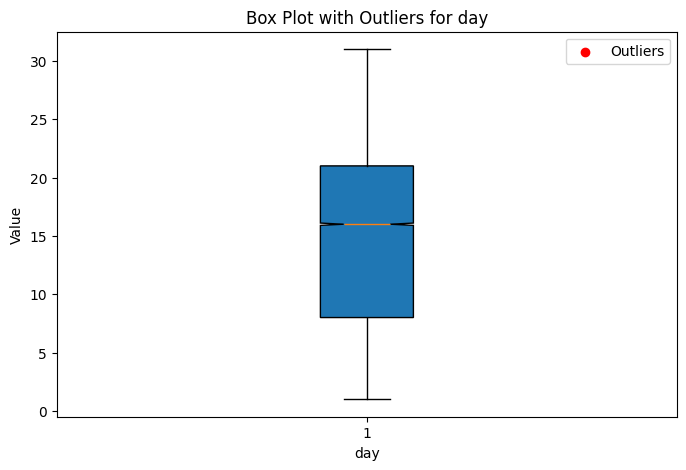

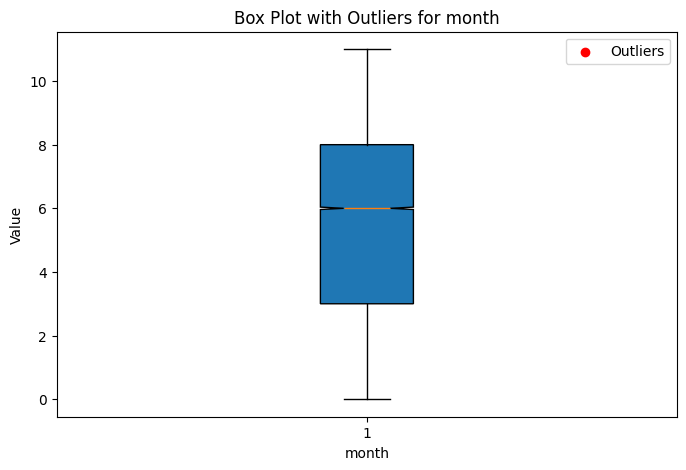

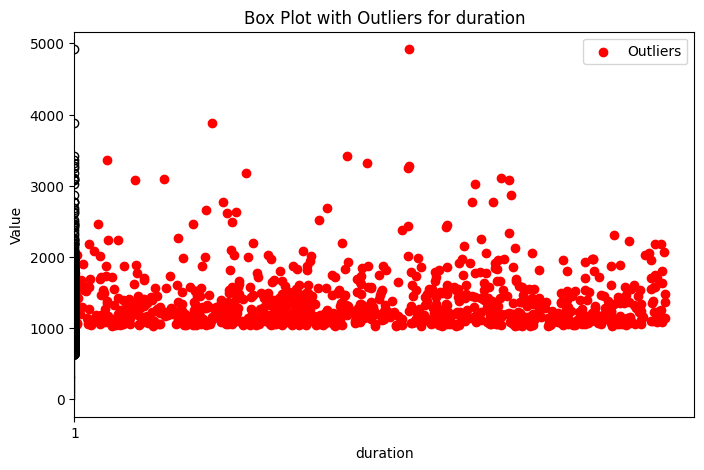

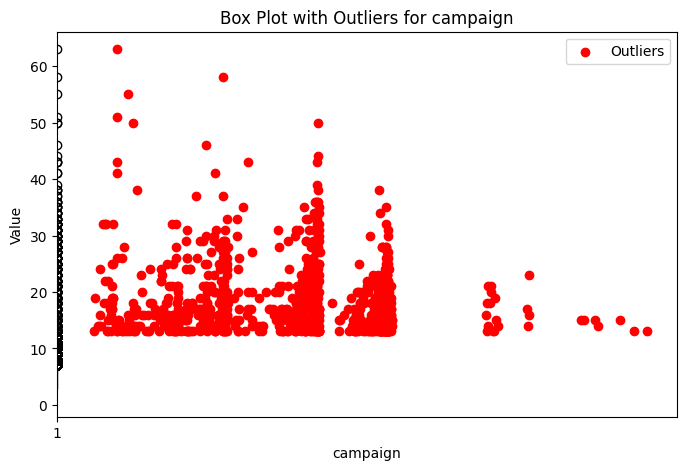

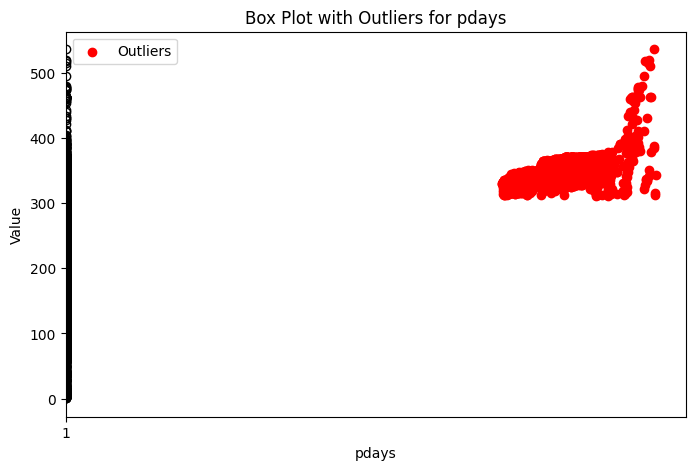

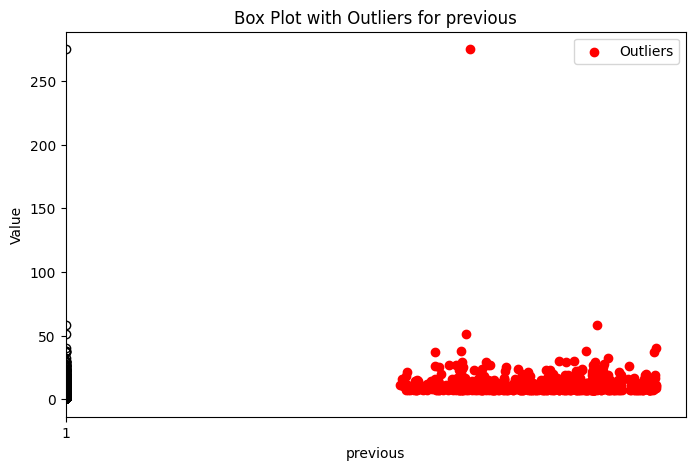

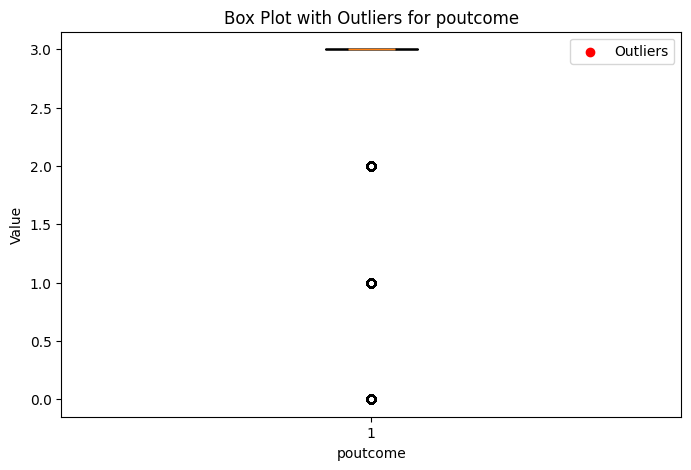

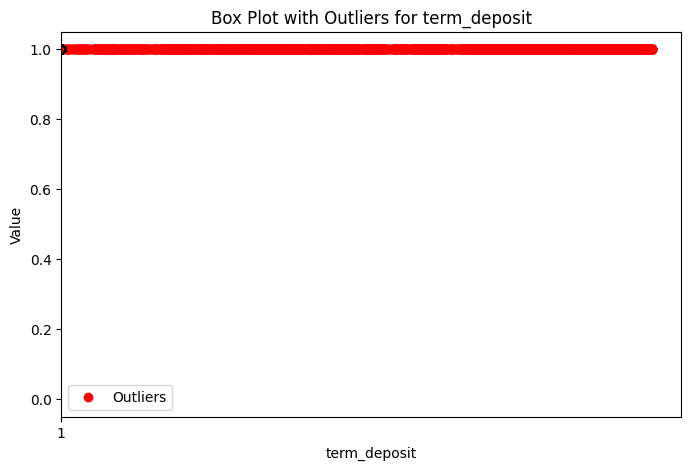

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, feature, threshold=3):
    z_scores = stats.zscore(data[feature])
    outliers = data[(abs(z_scores) > threshold)][feature]
    inliers = data[(abs(z_scores) <= threshold)][feature]

    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Examples of outliers: {outliers.head()}")  # View top 5 outliers
    print(f"Number of inliers: {len(inliers)}\n")

# Apply Z-score outlier detection to each numerical feature
for feature in numerical_features:
    detect_outliers_zscore(df.copy(), feature)

# Visualizing outliers using box plots
threshold = 3
for feature in numerical_features:
    z_scores = stats.zscore(df[feature])
    outliers = df[(abs(z_scores) > threshold)][feature]

    plt.figure(figsize=(8, 5))
    plt.boxplot(df[feature], notch=True, vert=True, patch_artist=True)
    plt.scatter(outliers.index, outliers, color='red', label='Outliers')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.title(f"Box Plot with Outliers for {feature}")
    plt.legend()
    plt.show()

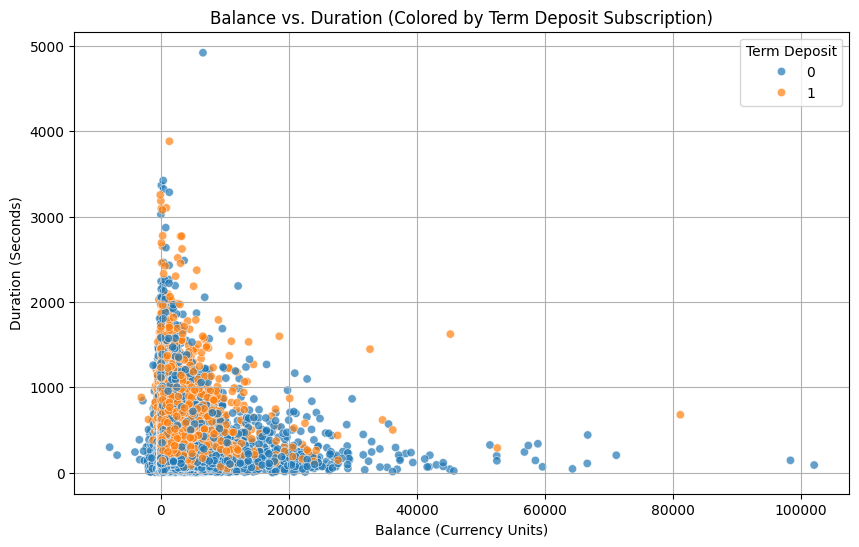

In [ ]:
df['term_deposit'] = df['term_deposit'].astype(str)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='balance', y='duration', hue='term_deposit', alpha=0.7)

plt.xlabel("Balance (Currency Units)")
plt.ylabel("Duration (Seconds)")
plt.title("Balance vs. Duration (Colored by Term Deposit Subscription)")
plt.legend(title="Term Deposit")
plt.grid(True)

# Show the plot
plt.show()

This scatter plot shows the relationship between Balance (x-axis) and Duration (y-axis), colored by Term Deposit Subscription (1 = Orange, 0 = Blue). Most points are clustered at lower balances and durations, with a few high-balance outliers. Longer durations seem to have more term deposit subscriptions.

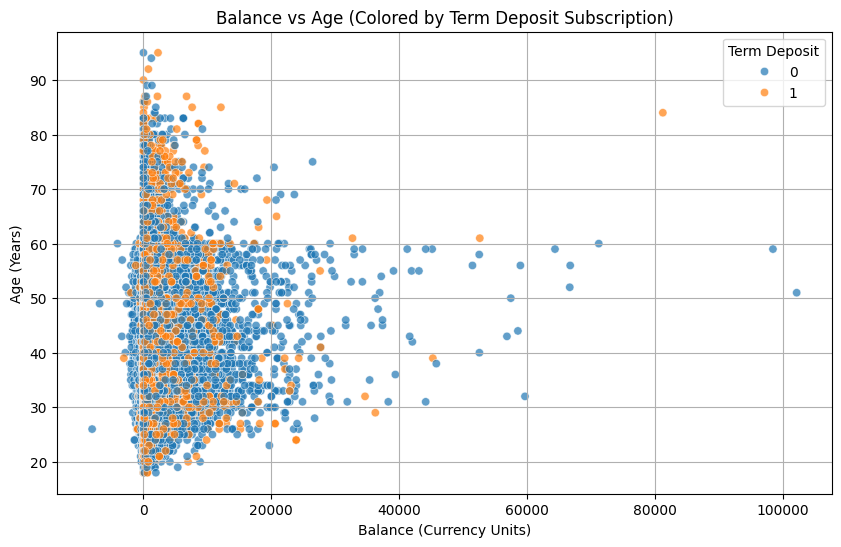

In [ ]:
df['term_deposit'] = df['term_deposit'].astype(str)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='balance', y='age', hue='term_deposit', alpha=0.7)

plt.xlabel("Balance (Currency Units)")
plt.ylabel("Age (Years)")
plt.title("Balance vs Age (Colored by Term Deposit Subscription)")
plt.legend(title="Term Deposit")
plt.grid(True)
plt.show()


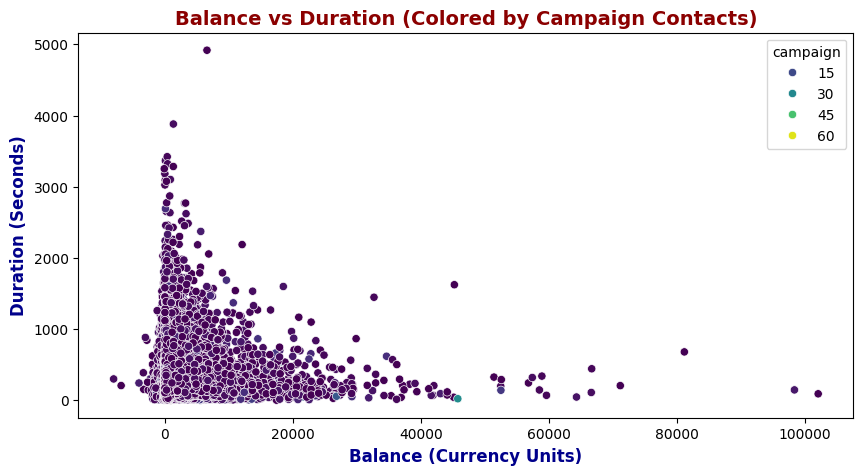

In [ ]:
 plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["balance"], y=df["duration"], hue=df["campaign"], palette="viridis")

plt.title("Balance vs Duration (Colored by Campaign Contacts)", fontsize=14, fontweight='bold', color='darkred')
plt.xlabel("Balance (Currency Units)", fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel("Duration (Seconds)", fontsize=12, fontweight='bold', color='darkblue')
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term_deposit', 'customer_tier'],
      dtype='object')

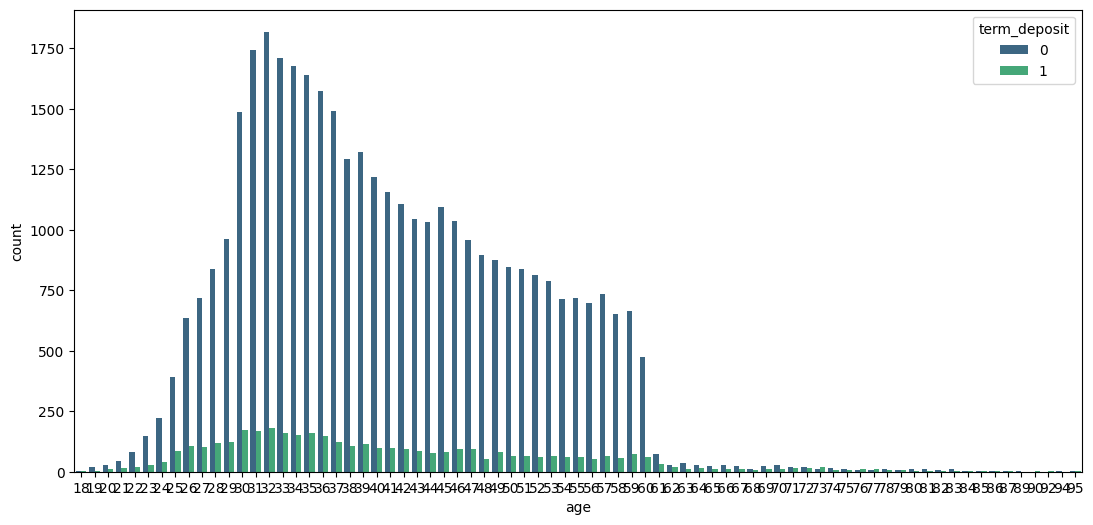

In [ ]:
# Create a count plot
plt.figure(figsize=(13, 6))
sns.countplot(x=df['age'], hue=df['term_deposit'], data=df, palette="viridis")

# Show the plot
plt.show()

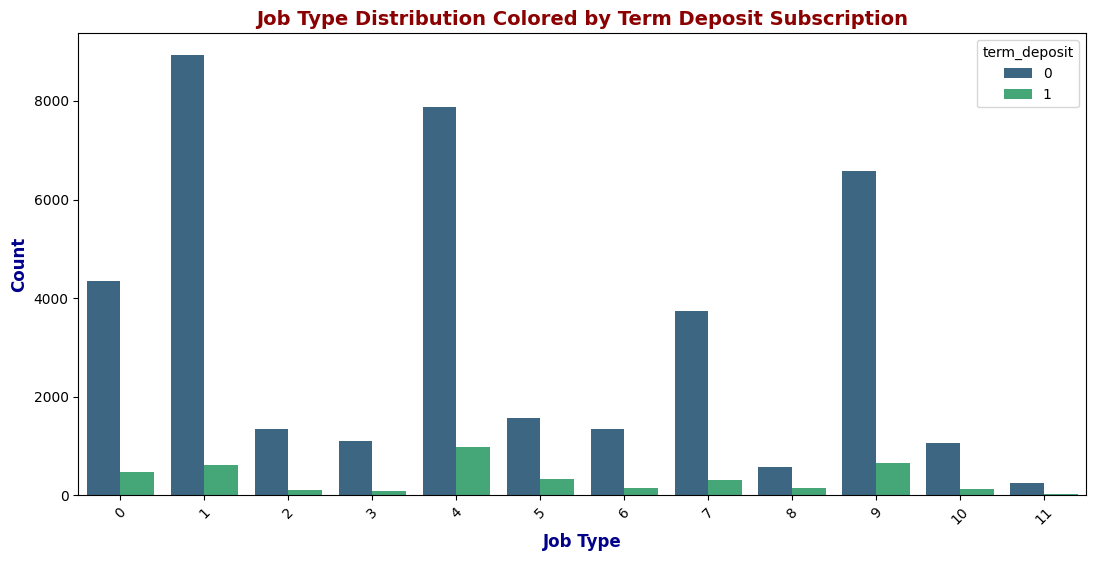

In [ ]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df['job'], hue=df['term_deposit'], data=df, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()

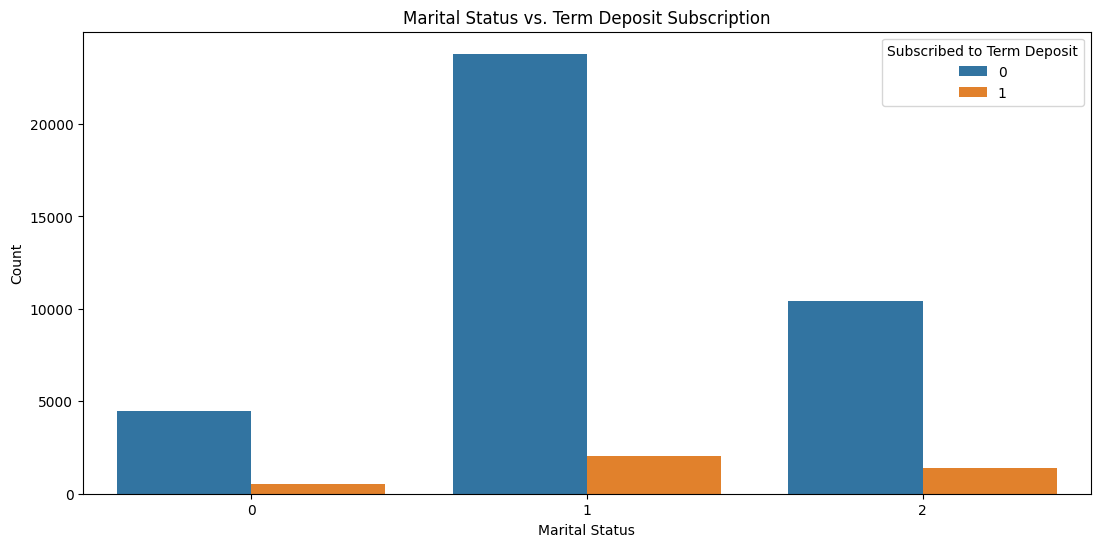

In [ ]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df["marital"], hue=df["term_deposit"], data=df)
plt.title("Marital Status vs. Term Deposit Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Subscribed to Term Deposit")
plt.show()

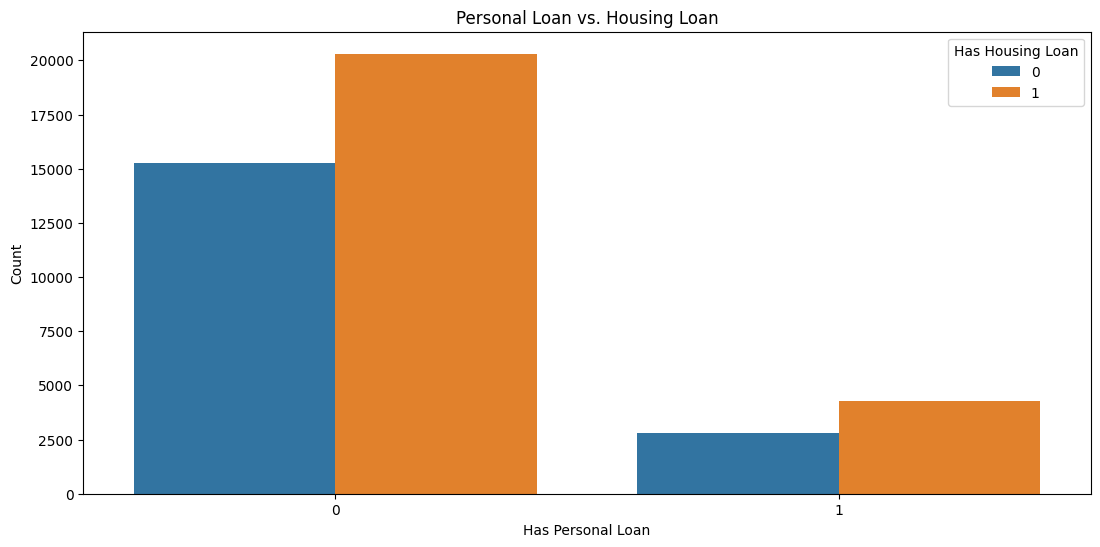

In [ ]:
plt.figure(figsize=(13, 6))
sns.countplot(x=df["loan"], hue=df["housing"], data=df)
plt.title("Personal Loan vs. Housing Loan")
plt.xlabel("Has Personal Loan")
plt.ylabel("Count")
plt.legend(title="Has Housing Loan")
plt.show()

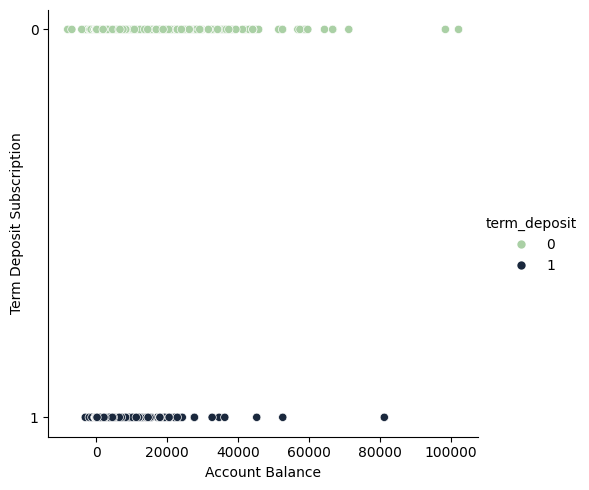

In [ ]:
# Create a scatter plot (relplot)
sns.relplot(data=df, x="balance", y="term_deposit", hue="term_deposit", palette="ch:r=-.5, l=.75")

# Add axis labels
plt.xlabel("Account Balance", fontsize=10)
plt.ylabel("Term Deposit Subscription", fontsize=10)

# Show the plot
plt.show()

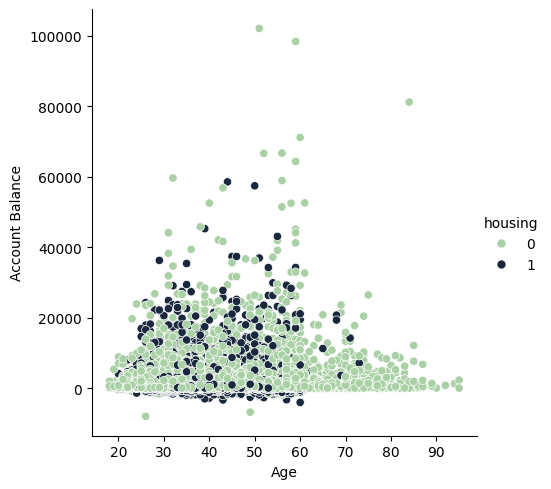

In [ ]:
# Create a scatter plot (relplot)
sns.relplot(data=df, x="age", y="balance", hue="housing", palette="ch:r=-.5,l=.75")

# Add axis labels
plt.xlabel("Age", fontsize=10)
plt.ylabel("Account Balance", fontsize=10)

# Show the plot
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['housing'], df['term_deposit'])

print("Contingency Table:")
print(contingency_table)
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.3f}, P-value: {p_value:.5f}")


Contingency Table:
term_deposit      0     1
housing                  
0             15761  2288
1             22917  1673
Chi-Square Statistic: 425.366, P-value: 0.00000


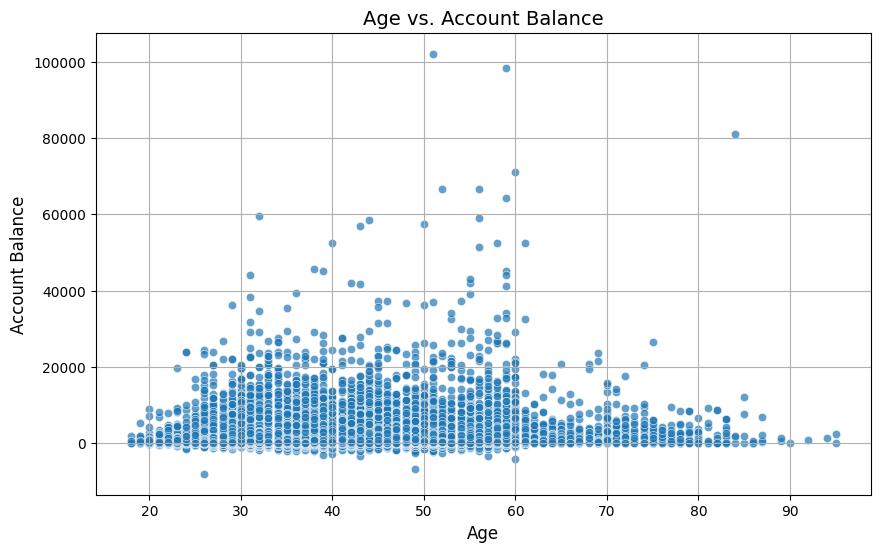

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="balance", alpha=0.7)

# Add labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Account Balance", fontsize=12)
plt.title("Age vs. Account Balance", fontsize=14)
plt.grid(True)

# Show plot
plt.show()

This scatter plot helps analyze how age relates to account balance. If a pattern emerges, it could provide insights for targeted marketing, loan offers, or financial planning services.

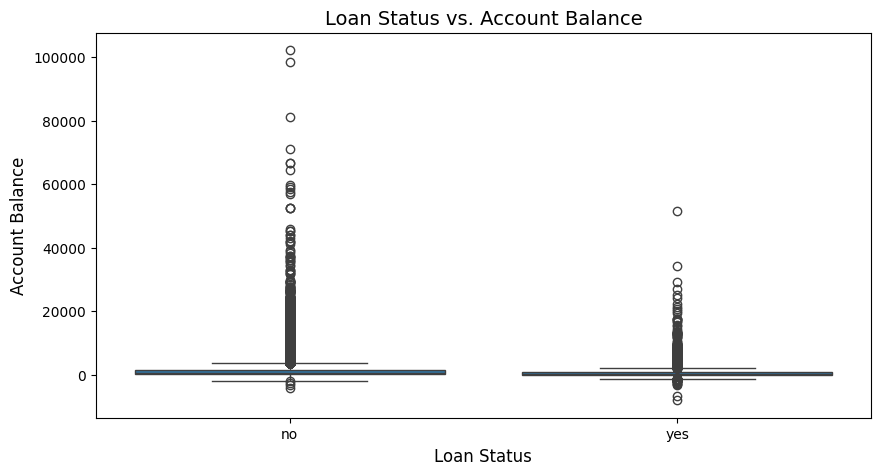

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["loan"], y=df["balance"])

# Add labels and title
plt.title("Loan Status vs. Account Balance", fontsize=14)
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Account Balance", fontsize=12)

# Show plot
plt.show()

In [ ]:
balance_corr = df.corr(numeric_only=True)[["balance"]].sort_values(by="balance", ascending=False)

# Display the correlation table
print(balance_corr)

           balance
balance   1.000000
age       0.088716
duration  0.016721
previous  0.005194
day       0.004696
pdays    -0.006797
campaign -0.013358


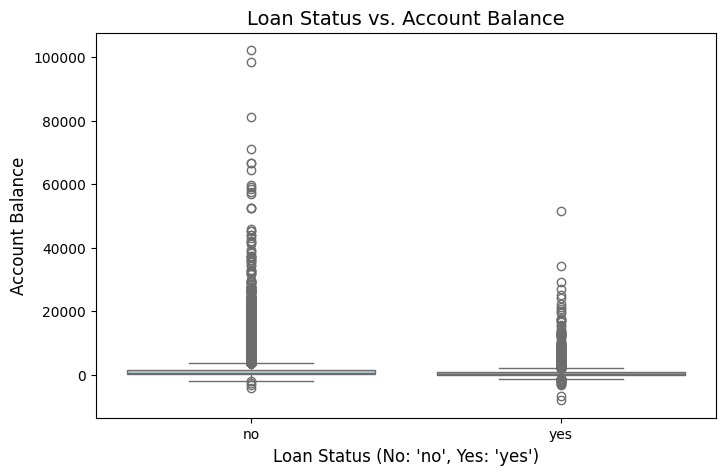

In [ ]:
df["loan"] = df["loan"].astype(str)  # Ensuring it's categorical

# Set figure size
plt.figure(figsize=(8, 5))

# Create a box plot
sns.boxplot(x=df["loan"], y=df["balance"], palette=["lightblue", "salmon"])

# Add labels and title
plt.title("Loan Status vs. Account Balance", fontsize=14)
plt.xlabel("Loan Status (No: 'no', Yes: 'yes')", fontsize=12)
plt.ylabel("Account Balance", fontsize=12)

# Show plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'term_deposit' column (Yes/No → 0/1)
df['term_deposit'] = label_encoder.fit_transform(df['term_deposit'])

# Print sample data to verify encoding
print(df[['term_deposit']].head())


   term_deposit
0             0
1             0
2             0
3             0
4             0


In [ ]:
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   

   term_deposit  
0             0  
1             0  
2             0  
3             0  
4             0  


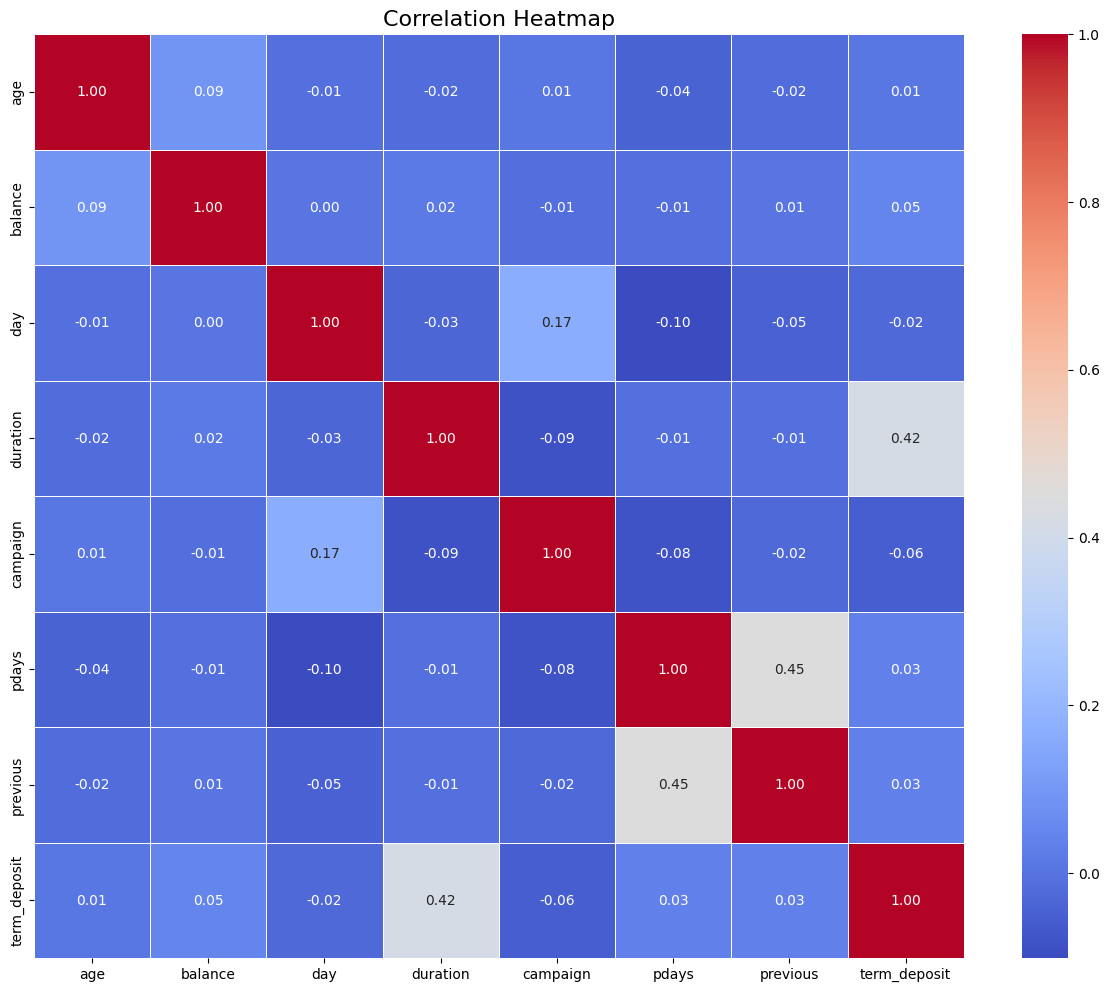

In [ ]:
corr_matrix = df.corr(numeric_only=True)  # Ensuring only numerical columns are used

# Set figure size
plt.figure(figsize=(15, 12))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=16)

# Show plot
plt.show()

In [ ]:
X = df.drop(columns=['term_deposit'])  # Drop target column
y = df['term_deposit']  # Set target variable

# Print shape of X and y to verify
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (42639, 16)
y shape: (42639,)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Print transformed data shape
print(f"Original X shape: {X.shape}")
print(f"Encoded X shape: {X_encoded.shape}")
print(f"Scaled X shape: {X_scaled.shape}")

Original X shape: (42639, 16)
Encoded X shape: (42639, 42)
Scaled X shape: (42639, 42)


In [ ]:
from sklearn.model_selection import train_test_split

X_encoded = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (34111, 42)
X_test shape: (8528, 42)
y_train shape: (34111,)
y_test shape: (8528,)


Building primary model



In [ ]:
import numpy as np

class MulticlassLogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # One-hot encoding of labels
        y_one_hot = np.eye(n_classes)[y]

        # Initialize weights & bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        # Gradient Descent
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            probs = self._softmax(linear_pred)

            # Compute loss (categorical cross-entropy)
            loss = -np.mean(np.sum(y_one_hot * np.log(probs + 1e-9), axis=1))
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / n_samples) * np.sum(probs - y_one_hot, axis=0, keepdims=True)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probs = self._softmax(linear_pred)
        return np.argmax(probs, axis=1)


In [ ]:

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Unique class labels:", np.unique(y_train))


Unique class labels: [0 1]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print(f"Accuracy Score = {accuracy:.4f}")
print(f"Precision Score = {precision:.4f}")
print(f"Recall Score = {recall:.4f}")
print(f"F1 Score = {f1:.4f}")




Accuracy Score = 0.9119
Precision Score = 0.7576
Recall Score = 0.5906
F1 Score = 0.6233


The model's accuracy is 0.94 which is good but precession and recall is low


Building two model

Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_dt)}")
print(f"precission Score = {precision_score(y_test,y_pred_dt,average='macro')}")
print(f"Recall Score = {recall_score(y_test,y_pred_dt,average='macro')}")
print(f"F1 Score = {f1_score(y_test,y_pred_dt,average='macro')}")

Accuracy Score = 0.8961069418386491
precission Score = 0.6935840526180518
Recall Score = 0.6905408902691512
F1 Score = 0.692044888573336


The model tends to increased its performance with accuracy score of 0.96


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn,average='macro')}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn,average='macro')}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn,average='macro')}")

Accuracy Score = 0.9118198874296435
precission Score = 0.7459683184264407
Recall Score = 0.621328933747412
F1 Score = 0.6560528274216555


The model with KNN shows 0.83 accuracy which perfroms poor than decision tree

Hyperparameter tuning

Decision Tree


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist_dt = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": randint(1, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
}

dt = DecisionTreeClassifier()

random_search_dt = RandomizedSearchCV(dt, param_dist_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
best_dt = random_search_dt.best_estimator_

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 12, 'splitter': 'best'}


In [ ]:
best_dt.fit(X_train,y_train)
y_pred_best_dt=best_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_best_dt)}")
print(f"precission Score = {precision_score(y_test,y_pred_best_dt,average='macro')}")
print(f"Recall Score = {recall_score(y_test,y_pred_best_dt,average='macro')}")
print(f"F1 Score = {f1_score(y_test,y_pred_best_dt,average='macro')}")

Accuracy Score = 0.9113508442776735
precission Score = 0.7421161939115701
Recall Score = 0.6261128364389235
F1 Score = 0.6601129447886398


The accuracy remains same but recall, f1 score decreases after hyperparameter tuning


KNN


In [ ]:
param_dist_knn = {
    "n_neighbors": randint(1, 50),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn = KNeighborsClassifier()
random_search_knn = RandomizedSearchCV(knn, param_dist_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", random_search_knn.best_params_)
best_knn = random_search_knn.best_estimator_

Best Parameters for KNN: {'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'uniform'}


In [ ]:
best_knn.fit(X_train,y_train)
y_pred_best_knn=best_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_best_knn)}")
print(f"precission Score = {precision_score(y_test,y_pred_best_knn,average='macro')}")
print(f"Recall Score = {recall_score(y_test,y_pred_best_knn,average='macro')}")
print(f"F1 Score = {f1_score(y_test,y_pred_best_knn,average='macro')}")

Accuracy Score = 0.913578799249531
precission Score = 0.7868196563739036
Recall Score = 0.579156314699793
F1 Score = 0.6103752621851183


No improvement in KNN model even after hyperparameter tuning

Future Selection


In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=dt, step=1, cv=5, scoring='accuracy', n_jobs=-1,min_features_to_select=int(0.8 * X_train.shape[1]))
selector.fit(X_train, y_train)

selected_features = np.where(selector.support_)[0]

print("Optimal number of features:", selector.n_features_)
print("Selected Features Index:", selected_features)

X_train_selected_dt = selector.transform(X_train)
X_test_selected_dt = selector.transform(X_test)

Optimal number of features: 13
Selected Features Index: [ 0  1  2  3  5  6  8  9 10 11 12 13 15]


KNN

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
mi = SelectKBest(score_func=mutual_info_regression, k=int(0.8 * X_train.shape[1]))
X_train_mi = mi.fit_transform(X_train, y_train)
X_test_mi = mi.transform(X_test)

Final model

In [ ]:
best_dt.fit(X_train_selected_dt,y_train)
y_pred_dt_final=best_dt.predict(X_test_selected_dt)

In [ ]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_dt_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_dt_final,average='macro')}")
print(f"Recall Score = {recall_score(y_test,y_pred_dt_final,average='macro')}")
print(f"F1 Score = {f1_score(y_test,y_pred_dt_final,average='macro')}")

Accuracy Score = 0.9113508442776735
precission Score = 0.7421161939115701
Recall Score = 0.6261128364389235
F1 Score = 0.6601129447886398


No improvement in decision tree model even after hyperparameter tuning and feture selection

In [ ]:
best_knn.fit(X_train_mi,y_train)
y_pred_knn_final=best_knn.predict(X_test_mi)
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_final,average='macro')}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_final,average='macro')}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_final,average='macro')}")

Accuracy Score = 0.9125234521575984
precission Score = 0.7579052510000843
Recall Score = 0.6009860248447205
F1 Score = 0.6356813611486329


The accuracy tends to decrease after hyperparameter tuning

So The decision tree outperforms the KNN model where Decision tree have accuracy of 0.96 which perfrom better in classifying performance tier